In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2019, 3, 19, 0, 25, 57, 642558)

In [5]:
now.day

19

In [6]:
now.weekday()

1

In [7]:
from datetime import date, time

In [8]:
time(3, 24)
date(1970, 9, 3)

datetime.date(1970, 9, 3)

In [10]:
my_age = now  - datetime(1970, 9, 3)
my_age

datetime.timedelta(days=17729, seconds=1557, microseconds=642558)

In [11]:
my_age.days/365.

48.57260273972603

In [12]:
segments = pd.read_csv('https://raw.githubusercontent.com/fonnesbeck/statistical-analysis-python-tutorial/master/data/AIS/transit_segments.csv')
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


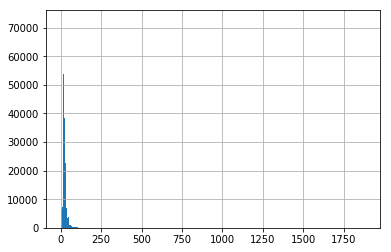

In [13]:
segments.seg_length.hist(bins = 500)

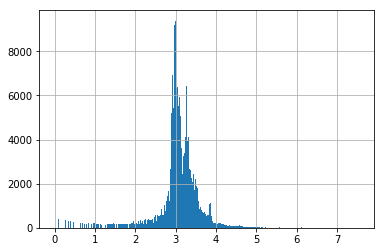

In [14]:
segments.seg_length.apply(np.log).hist(bins = 500)

In [15]:
segments.st_time.dtype

dtype('O')

In [16]:
datetime.strptime(segments.st_time.iloc[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

In [17]:
from dateutil.parser import parse

In [18]:
parse(segments.st_time.iloc[0])

datetime.datetime(2009, 2, 10, 16, 3)

In [19]:
segments.st_time.apply(lambda d : datetime.strptime(d, '%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
                 ...        
262514   2010-05-19 19:46:00
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [20]:
pd.to_datetime(segments.st_time)

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
                 ...        
262514   2010-05-19 19:46:00
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [21]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
vessels = pd.read_csv('https://raw.githubusercontent.com/fonnesbeck/statistical-analysis-python-tutorial/master/data/AIS/vessel_information.csv', index_col = 'mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


In [23]:
[v for v in vessels.type.unique() if v.find('/') == -1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [24]:
vessels.type.value_counts()

Cargo                                  5622
Tanker                                 2440
Pleasure                                601
Tug                                     221
Sailing                                 205
Fishing                                 200
Other                                   178
Passenger                               150
Towing                                  117
Unknown                                 106
MilOps                                   82
Cargo/Unknown                            79
                                       ... 
Law/Other/Tanker                          1
AntiPol/Fishing/Pleasure                  1
Cargo/Tanker/Tug                          1
BigTow/Pleasure/Reserved/Towing/Tug       1
Sailing/WIG                               1
MilOps/Other/Reserved/SAR                 1
Pilot/Towing/Tug                          1
Cargo/Other/Reserved                      1
Pleasure/Tender                           1
BigTow/Tug/WIG                  

In [31]:
df1 = pd.DataFrame(dict(id = range(4), age = np.random.randint(18, 31, size = 4)))
df2 = pd.DataFrame(dict(id = list(range(3))+list(range(3)), score = np.random.random(size = 6)))

df1, df2

(   id  age
 0   0   26
 1   1   30
 2   2   28
 3   3   22,    id     score
 0   0  0.708429
 1   1  0.423032
 2   2  0.995941
 3   0  0.756016
 4   1  0.510127
 5   2  0.215042)

In [32]:
pd.merge(df1, df2)

,id,age,score
0,0,26,0.708429
1,0,26,0.756016
2,1,30,0.423032
3,1,30,0.510127
4,2,28,0.995941
5,2,28,0.215042


In [33]:
pd.merge(df1, df2, how = 'outer')

,id,age,score
0,0,26,0.708429
1,0,26,0.756016
2,1,30,0.423032
3,1,30,0.510127
4,2,28,0.995941
5,2,28,0.215042
6,3,22,NaN


In [34]:
segments.head(1)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27


In [35]:
vessels.head(1)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing


In [37]:
segments_merged = pd.merge(vessels, segments, left_index = True, right_on = 'mmsi')

In [38]:
segments_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [39]:
vessels.merge(segments, left_index = True, right_on = 'mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [40]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index = True, right_on = 'mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_x,...,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type_y
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27,foo
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20,foo
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55,foo
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34,foo
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35,foo


In [41]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.41384871, 0.65642427, 0.79644884, 0.15684983, 0.41789539,
       0.81635542, 0.02953005, 0.34034723, 0.88157305, 0.98672285])

In [42]:
np.r_[np.random.random(5), np.random.random(5)]

array([0.14067652, 0.0434846 , 0.84592774, 0.43534835, 0.82293376,
       0.10887518, 0.13700729, 0.18794465, 0.8381116 , 0.26479717])

In [43]:
np.c_[np.random.random(5), np.random.random(5)]

array([[0.91632735, 0.76296342],
       [0.92710621, 0.21403668],
       [0.82048016, 0.87049933],
       [0.05123945, 0.41021623],
       [0.65157311, 0.33423922]])

In [45]:
mb1 = pd.read_excel('https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/data/microbiome/MID1.xls?raw=true', 'Sheet 1',index_col = 0, header = None)
mb2 = pd.read_excel('https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/data/microbiome/MID2.xls?raw=true', 'Sheet 1',index_col = 0, header = None)

mb1.shape, mb2.shape

((272, 1), (288, 1))

mb

In [46]:
mb1.head()

,1
0,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


In [47]:
mb1.columns = mb2.columns = ['Count']

In [48]:
mb1.index.name = mb2.index.name = 'Taxon'

In [49]:
mb1.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


In [50]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [51]:
mb1.index.is_unique

True

In [52]:
pd.concat([mb1, mb2], axis = 0).shape

(560, 1)

In [53]:
pd.concat([mb1, mb2], axis = 0).index.is_unique

False

In [54]:
pd.concat([mb1, mb2], axis = 1).shape

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(438, 2)

In [55]:
pd.concat([mb1, mb2], axis = 1).head()

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


In [56]:
pd.concat([mb1, mb2], axis = 1).values[:5]

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


array([[nan,  2.],
       [nan, 14.],
       [ 7., 23.],
       [nan,  1.],
       [nan,  2.]])

In [57]:
pd.concat([mb1, mb2], axis = 1, join = 'inner').head()

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,10
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,9
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,9


In [58]:
mb1.combine_first(mb2).head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2.0


In [59]:
pd.concat([mb1, mb2], keys = ['patient1', 'patient2']).head()

Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [60]:
pd.concat([mb1, mb2], keys = ['patient1', 'patient2']).index.is_unique

True

In [61]:
pd.concat(dict(patient1 = mb1, patient2 = mb2), axis = 1).head()

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,patient1,patient2
,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


In [62]:
cdystonia = pd.read_csv('https://github.com/fonnesbeck/statistical-analysis-python-tutorial/raw/master/data/cdystonia.csv', index_col = None)
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [63]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        32
1    patient        1
     obs            2
     week           2
                ...  
629  age           57
     sex            M
     twstrs        36
630  patient      109
     obs            6
     week          16
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

In [64]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [65]:
cdystonia2 = cdystonia.set_index(['patient', 'obs'])
cdystonia2.head()

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [66]:
cdystonia2.index.is_unique

True

In [67]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [68]:
cdystonia_long = cdystonia[['patient', 'site','id','treat','age','sex']].drop_duplicates().merge(
twstrs_wide, right_index = True, left_on = 'patient', how = 'inner').head()

In [69]:
cdystonia_long

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


In [71]:
cdystonia.set_index(['patient', 'site', 'id', 'treat', 'age', 'sex','week'])['twstrs'].unstack('week').head()

,,,,,week,0,2,4,8,12,16
patient,site,id,treat,age,sex,,,,,,
1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


In [72]:
pd.melt(cdystonia_long, id_vars = ['patient','site','id','treat','age','sex'],
       var_name = 'obs', value_name = 'twstrs').head()

,patient,site,id,treat,age,sex,obs,twstrs
0,1,1,1,5000U,65,F,1,32.0
1,2,1,2,10000U,70,F,1,60.0
2,3,1,3,5000U,64,F,1,44.0
3,4,1,4,Placebo,59,F,1,53.0
4,5,1,5,10000U,76,F,1,53.0


In [73]:
cdystonia.pivot(index = 'patient', columns = 'obs', values = 'twstrs').head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [74]:
cdystonia.pivot('patient','obs')

week                            site                 ...   sex       \
obs        1    2    3    4     5     6    1    2    3    4  ...     3    4   
patient                                                      ...              
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
2        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
3        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
4        0.0  2.0  4.0  8.0   NaN   NaN  1.0  1.0  1.0  1.0  ...     F    F   
5        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
6        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
7        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     M    M   
8        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     M    M   
9        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
10       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     M    M   
11       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
12       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...  ...   
98       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     F    F   
99       0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...     M    M   
100      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...     M    M   
101      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...     M    M   
102      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...     F    F   
103      0.0  2.0  4.0  NaN  12.0  16.0  9.0  9.0  9.0  NaN  ...     F  NaN   
104      0.0  2.0  4.0  NaN  12.0  16.0  9.0  9.0  9.0  NaN  ...     F  NaN   
105      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...     F    F   
106      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...     M    M   
107      0.0  NaN  4.0  8.0   NaN  16.0  9.0  NaN  9.0  9.0  ...     M    M   
108      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...     F    F   
109      0.0  2.0  NaN  8.0  12.0  16.0  9.0  9.0  NaN  9.0  ...   NaN    M   

                  twstrs                                
obs        5    6      1     2     3     4     5     6  
patient                                                 
1          F    F   32.0  30.0  24.0  37.0  39.0  36.0  
2          F    F   60.0  26.0  27.0  41.0  65.0  67.0  
3          F    F   44.0  20.0  23.0  26.0  35.0  35.0  
4        NaN  NaN   53.0  61.0  64.0  62.0   NaN   NaN  
5          F    F   53.0  35.0  48.0  49.0  41.0  51.0  
6          F    F   49.0  34.0  43.0  48.0  48.0  51.0  
7          M    M   42.0  32.0  32.0  43.0  42.0  46.0  
8          M    M   34.0  33.0  21.0  27.0  32.0  38.0  
9          F    F   41.0  32.0  34.0  35.0  37.0  36.0  
10         M    M   27.0  10.0  31.0  32.0   6.0  14.0  
11         F    F   48.0  41.0  32.0  35.0  57.0  51.0  
12         F    F   34.0  19.0  21.0  24.0  28.0  28.0  
...      ...  ...    ...   ...   ...   ...   ...   ...  
98         F    F   40.0  28.0  29.0  30.0  37.0  44.0  
99         M    M   40.0  16.0  18.0  25.0  33.0  48.0  
100        M    M   61.0  52.0  61.0  68.0  59.0  71.0  
101        M    M   35.0  21.0  29.0  30.0  35.0  48.0  
102        F    F   58.0  38.0  50.0  53.0  47.0  59.0  
103        F    F   49.0  45.0  36.0   NaN  40.0  52.0  
104        F    F   52.0  46.0  36.0   NaN  45.0  54.0  
105        F    F   45.0  46.0  33.0  44.0  46.0  48.0  
106        M    M   67.0  63.0  71.0  66.0  68.0  71.0  
107      NaN    M   57.0   NaN  36.0  23.0   NaN  52.0  
108        F    F   63.0  51.0  46.0  50.0  50.0  54.0  
109        M    M   53.0  38.0   NaN  33.0  36.0  51.0  

[109 rows x 42 columns]

In [76]:
cdystonia.pivot_table(index = ['site', 'treat'], columns = 'week', values = 'twstrs', aggfunc = max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

In [77]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


In [81]:
vessels.duplicated(subset ='names')

mmsi
1            False
9            False
21           False
74           False
103          False
310          False
3011         False
4731         False
15151        False
46809        False
80404        False
82003        False
             ...  
770576100    False
812719000    False
857632392    False
866946820     True
888888882     True
888888888    False
900000000    False
919191919    False
967191190     True
975318642     True
987654321    False
999999999     True
Length: 10771, dtype: bool

In [82]:
vessels.drop_duplicates(['names'])

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
310,1,Arabella,N,Bermuda,Foreign,1,47.0,47.0,1,Unknown
3011,1,Charleston,N,Anguilla,Foreign,1,160.0,160.0,1,Other
4731,1,000004731,N,Yemen (Republic of),Foreign,1,30.0,30.0,1,Unknown
15151,2,R L Enterkin/Us Vessel,N,Unknown,Unknown,2,60.0/175.0,175.0,1,Tug


In [83]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

In [84]:
treatment_map = {'Placebo': 0, '5000U' : 1, '10000U' : 2}

In [87]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
       ..
619   NaN
620   NaN
621   NaN
622   NaN
623   NaN
624   NaN
625   NaN
626   NaN
627   NaN
628   NaN
629   NaN
630   NaN
Name: treatment, Length: 631, dtype: float64

In [88]:
vals = pd.Series([float(i) **10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [89]:
np.log(vals)

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In [90]:
cdystonia2.treat.replace({'Placebo':0, '5000U':1, '10000U':2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
2        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
               ..
107      6      2
108      1      2
         2      2
         3      2
         4      2
         5      2
         6      2
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

In [91]:
top5 = vessels.type.apply(lambda s : s in vessels.type.value_counts().index[:5])
vessels5 = vessels[top5]

In [92]:
pd.get_dummies(vessels5.type).head(10)

,Cargo,Pleasure,Sailing,Tanker,Tug
mmsi,,,,,
15151,0,0,0,0,1
80404,0,1,0,0,0
366235,1,0,0,0,0
587370,0,0,0,0,1
693559,0,0,0,0,1
1233916,0,1,0,0,0
3041300,1,0,0,0,0
3663760,1,0,0,0,0
3688360,1,0,0,0,0


In [93]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

In [94]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
5     (60, 70]
6     (60, 70]
7     (60, 70]
8     (60, 70]
9     (60, 70]
10    (60, 70]
11    (60, 70]
        ...   
18    (50, 60]
19    (50, 60]
20    (50, 60]
21    (50, 60]
22    (70, 80]
23    (70, 80]
24    (70, 80]
25    (70, 80]
26    (70, 80]
27    (70, 80]
28    (50, 60]
29    (50, 60]
Name: age, Length: 30, dtype: category
Categories (7, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

In [95]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right = False)[:30]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
        ...   
18    [50, 60)
19    [50, 60)
20    [50, 60)
21    [50, 60)
22    [70, 80)
23    [70, 80)
24    [70, 80)
25    [70, 80)
26    [70, 80)
27    [70, 80)
28    [50, 60)
29    [50, 60)
Name: age, Length: 30, dtype: category
Categories (7, interval[int64]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

In [96]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels = ['young','middle-age','old','ancient'])[:30]

0            old
1            old
2            old
3            old
4            old
5            old
6            old
7            old
8            old
9            old
10           old
11           old
         ...    
18    middle-age
19    middle-age
20    middle-age
21    middle-age
22           old
23           old
24           old
25           old
26           old
27           old
28    middle-age
29    middle-age
Name: age, Length: 30, dtype: category
Categories (4, object): [young < middle-age < old < ancient]

In [98]:
pd.qcut(cdystonia.age, 4)[:30]

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
5     (56.0, 65.0]
6     (65.0, 83.0]
7     (65.0, 83.0]
8     (65.0, 83.0]
9     (65.0, 83.0]
10    (65.0, 83.0]
11    (65.0, 83.0]
          ...     
18    (56.0, 65.0]
19    (56.0, 65.0]
20    (56.0, 65.0]
21    (56.0, 65.0]
22    (65.0, 83.0]
23    (65.0, 83.0]
24    (65.0, 83.0]
25    (65.0, 83.0]
26    (65.0, 83.0]
27    (65.0, 83.0]
28    (56.0, 65.0]
29    (56.0, 65.0]
Name: age, Length: 30, dtype: category
Categories (4, interval[float64]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

In [99]:
quantiles = pd.qcut(segments.seg_length,[0,0.01,0.05,0.95,0.99,1])
quantiles[:30]

0       (1.8, 7.8]
1      (7.8, 45.4]
2       (1.8, 7.8]
3      (7.8, 45.4]
4      (7.8, 45.4]
5      (7.8, 45.4]
6     (45.4, 89.7]
7      (7.8, 45.4]
8      (7.8, 45.4]
9      (7.8, 45.4]
10      (1.8, 7.8]
11     (7.8, 45.4]
          ...     
18     (7.8, 45.4]
19     (7.8, 45.4]
20      (1.8, 7.8]
21      (1.8, 7.8]
22     (7.8, 45.4]
23     (7.8, 45.4]
24     (7.8, 45.4]
25     (7.8, 45.4]
26     (7.8, 45.4]
27     (7.8, 45.4]
28     (7.8, 45.4]
29     (7.8, 45.4]
Name: seg_length, Length: 30, dtype: category
Categories (5, interval[float64]): [(0.999, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] < (89.7, 1882.0]]

In [100]:
pd.get_dummies(quantiles).head(10)

,"(0.999, 1.8]","(1.8, 7.8]","(7.8, 45.4]","(45.4, 89.7]","(89.7, 1882.0]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


In [101]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([ 90408, 241418,  35617,  21365,  38495, 111261,  66703, 206886,
        12166,  92212, 161906,  91753, 183844,  21358, 170120, 254819,
       120850, 178285, 244423,  34596, 217939, 111145, 174928, 140218,
       194230, 250736,  49262, 215407, 258932, 168686])

In [102]:
segments.take(new_order).head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
90408,354215000,Carnival Pride,301,1,17.1,10.1,6.5,13.5,51.4,3/18/12 1:56,3/18/12 3:46,foo
241418,636012690,Torgovy Bridge,31,1,22.8,12.0,8.1,14.6,77.9,11/26/10 20:55,11/26/10 22:44,foo
35617,247281100,Grande Marocco,27,1,31.8,16.2,8.3,19.8,98.5,9/4/10 1:41,9/4/10 3:39,foo
21365,235066053,Cma Cgm Amber,15,2,19.6,13.8,5.4,16.9,87.1,5/1/09 22:25,5/1/09 23:51,foo
38495,249895000,Arosa,4,1,18.8,10.6,10.3,11.8,100.0,11/29/09 13:33,11/29/09 15:21,foo


In [103]:
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27,foo
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20,foo
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55,foo
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34,foo
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35,foo


In [104]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)


In [105]:
cdystonia_grouped

In [107]:
for patient, group in cdystonia_grouped:
    print(patient)
    print(group)
    print

1
   patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1      1   65   F      32        NaN
1        1    2     2     1   1      1   65   F      30        NaN
2        1    3     4     1   1      1   65   F      24        NaN
3        1    4     8     1   1      1   65   F      37        NaN
4        1    5    12     1   1      1   65   F      39        NaN
5        1    6    16     1   1      1   65   F      36        NaN
2
    patient  obs  week  site  id  treat  age sex  twstrs  treatment
6         2    1     0     1   2      2   70   F      60        NaN
7         2    2     2     1   2      2   70   F      26        NaN
8         2    3     4     1   2      2   70   F      27        NaN
9         2    4     8     1   2      2   70   F      41        NaN
10        2    5    12     1   2      2   70   F      65        NaN
11        2    6    16     1   2      2   70   F      67        NaN
3
    patient  obs  week  site  id  treat  age sex 

364       62    6    16     6  10      0   48   F      49        NaN
63
     patient  obs  week  site  id  treat  age sex  twstrs  treatment
365       63    1     0     6  11      2   57   M      55        NaN
366       63    2     2     6  11      2   57   M      34        NaN
367       63    3     4     6  11      2   57   M      26        NaN
368       63    4     8     6  11      2   57   M      40        NaN
369       63    5    12     6  11      2   57   M      49        NaN
370       63    6    16     6  11      2   57   M      47        NaN
64
     patient  obs  week  site  id  treat  age sex  twstrs  treatment
371       64    1     0     6  12      1   39   M      46        NaN
372       64    2     2     6  12      1   39   M      44        NaN
373       64    3     4     6  12      1   39   M      47        NaN
374       64    4     8     6  12      1   39   M      50        NaN
375       64    5    12     6  12      1   39   M      46        NaN
376       64    6    16     

In [109]:
cdystonia_grouped.agg(np.mean).head()

,patient,obs,week,site,id,treat,age,twstrs,treatment
patient,,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,1.0,65.0,33.000000,NaN
2,2.0,3.5,7.0,1.0,2.0,2.0,70.0,47.666667,NaN
3,3.0,3.5,7.0,1.0,3.0,1.0,64.0,30.500000,NaN
4,4.0,2.5,3.5,1.0,4.0,0.0,59.0,60.000000,NaN
5,5.0,3.5,7.0,1.0,5.0,2.0,76.0,46.166667,NaN


In [111]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,treat_mean,age_mean,twstrs_mean,treatment_mean
patient,,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,1.0,65.0,33.000000,NaN
2,2.0,3.5,7.0,1.0,2.0,2.0,70.0,47.666667,NaN
3,3.0,3.5,7.0,1.0,3.0,1.0,64.0,30.500000,NaN
4,4.0,2.5,3.5,1.0,4.0,0.0,59.0,60.000000,NaN
5,5.0,3.5,7.0,1.0,5.0,2.0,76.0,46.166667,NaN


In [113]:
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
6      48.0
7      42.0
8      32.5
9      35.5
10     20.5
11     44.5
12     26.0
       ... 
98     33.5
99     29.0
100    61.0
101    32.5
102    51.5
103    45.0
104    46.0
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, Length: 109, dtype: float64

In [115]:
cdystonia.groupby(['week','site']).mean().head()

patient  obs   id     treat        age     twstrs  treatment
week site                                                              
0    1         6.5  1.0  6.5  1.000000  59.000000  43.083333        NaN
     2        19.5  1.0  7.5  0.928571  53.928571  51.857143        NaN
     3        32.5  1.0  6.5  1.000000  51.500000  38.750000        NaN
     4        42.5  1.0  4.5  1.000000  59.250000  48.125000        NaN
     5        49.5  1.0  3.5  1.000000  51.833333  49.333333        NaN

In [116]:
normalize = lambda x : (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

C:\Users\aikan\Anaconda3\lib\site-packages\pandas\core\ops.py:1037: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: op(x, rvalues))


,patient,obs,week,site,id,treat,age,twstrs,treatment
0,NaN,-1.336306,-1.135550,NaN,NaN,NaN,NaN,-0.181369,NaN
1,NaN,-0.801784,-0.811107,NaN,NaN,NaN,NaN,-0.544107,NaN
2,NaN,-0.267261,-0.486664,NaN,NaN,NaN,NaN,-1.632322,NaN
3,NaN,0.267261,0.162221,NaN,NaN,NaN,NaN,0.725476,NaN
4,NaN,0.801784,0.811107,NaN,NaN,NaN,NaN,1.088214,NaN


In [117]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [118]:
chunks = dict(list(cdystonia_grouped))

In [119]:
chunks[4]

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment
18,4,1,0,1,4,0,59,F,53,NaN
19,4,2,2,1,4,0,59,F,61,NaN
20,4,3,4,1,4,0,59,F,64,NaN
21,4,4,8,1,4,0,59,F,62,NaN


In [120]:
dict(list(cdystonia.groupby(cdystonia.dtypes, axis = 1)))

{dtype('int64'):      patient  obs  week  site  id  treat  age  twstrs
 0          1    1     0     1   1      1   65      32
 1          1    2     2     1   1      1   65      30
 2          1    3     4     1   1      1   65      24
 3          1    4     8     1   1      1   65      37
 4          1    5    12     1   1      1   65      39
 5          1    6    16     1   1      1   65      36
 6          2    1     0     1   2      2   70      60
 7          2    2     2     1   2      2   70      26
 8          2    3     4     1   2      2   70      27
 9          2    4     8     1   2      2   70      41
 10         2    5    12     1   2      2   70      65
 11         2    6    16     1   2      2   70      67
 ..       ...  ...   ...   ...  ..    ...  ...     ...
 619      107    6    16     9   9      2   50      52
 620      108    1     0     9  10      2   39      63
 621      108    2     2     9  10      2   39      51
 622      108    3     4     9  10      2   39   

In [121]:
cdystonia2.head(10)

week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [122]:
cdystonia2.groupby(level = 'obs', axis = 0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

In [123]:
def top(df, column, n = 5):
    return df.sort_index(by = column, ascending = False)[:n]

In [124]:
top3segments = segments_merged.groupby('mmsi').apply(top, column = 'seg_length', n = 3)[['names', 'seg_length']]
top3segments

C:\Users\aikan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


names  \
mmsi                                                                  
1         6       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          5       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          7       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
9         15                             000000009/Raven/Shearwater   
          14                             000000009/Raven/Shearwater   
          13                             000000009/Raven/Shearwater   
21        16                                          Us Gov Vessel   
          25                                          Us Gov Vessel   
          30                                          Us Gov Vessel   
74        35                                      Mcfaul/Sarah Bell   
          34                                      Mcfaul/Sarah Bell   
103       37               Ron G/Us Navy Warship 103/Us Warship 103   
...                                                             ...   
967191190 262409                                         Pathfinder   
          262412                                         Pathfinder   
          262423                                         Pathfinder   
975318642 262478                                     Island Express   
          262482                                     Island Express   
          262481                                     Island Express   
987654321 262498                         Island Lookout/Island Tide   
          262507                         Island Lookout/Island Tide   
          262510                         Island Lookout/Island Tide   
999999999 262520                                  Triple Attraction   
          262524                                  Triple Attraction   
          262525                                  Triple Attraction   

                  seg_length  
mmsi                          
1         6             76.0  
          5             17.4  
          7             13.7  
9         15            47.2  
          14            31.4  
          13            19.3  
21        16            48.7  
          25            25.3  
          30            21.7  
74        35             7.4  
          34             1.4  
103       37            87.5  
...                      ...  
967191190 262409        32.7  
          262412        30.6  
          262423        30.4  
975318642 262478        85.8  
          262482        29.5  
          262481        27.7  
987654321 262498        22.5  
          262507        20.9  
          262510        18.6  
999999999 262520        65.0  
          262524        31.5  
          262525        19.8  

[29464 rows x 2 columns]

In [125]:
top3segments.head(20)

names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4
     58                                           Arabella        30.7
     49                                           Arabella        30.4
3011 74                                         Charleston       121.6
     69                                         Charleston        89.7
     77                                         Charleston        59.7

In [126]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [128]:
class_index = mb1.index.map(lambda x : ' '.join(x.split(' ')[:3]))
mb_class = mb1.copy()
mb_class.index = class_index

In [129]:
mb_class.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei",7
"Archaea ""Crenarchaeota"" Thermoprotei",2
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",7


In [130]:
mb_class.groupby(level = 0).sum().head(10)

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei",15
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",9
"Archaea ""Euryarchaeota"" Archaeoglobi",2
"Archaea ""Euryarchaeota"" Halobacteria",12
"Archaea ""Euryarchaeota"" Methanococci",1
"Archaea ""Euryarchaeota"" Methanopyri",12
"Archaea ""Euryarchaeota"" Thermoplasmata",2
"Bacteria ""Actinobacteria"" Actinobacteria",1740
"Bacteria ""Aquificae"" Aquificae",11
